# Robustness Checks and Data Cleaning Visuals

#### This script first produces visuals, which explain the data cleaning process and after that it computes descriptives states for non cleaned dataset variables, as a robustness check

In [25]:
# Import the required libraries
from zipfile import ZipFile
import pandas as pd
import numpy as np
import os
import pickle
import sys  
import plotly.express as px
import plotly.graph_objects as go
import fuzzywuzzy as fw
from fuzzywuzzy import fuzz
import seaborn as sns
import seaborn.objects as so 
import openpyxl
#from functions_cleaning import *
import geopy
from geopy import distance
import statsmodels.formula.api as sm
import plotly.graph_objects as go
from plotnine import *
import matplotlib.pyplot as plt
from statistics import mean
#import functions_empirical_analysis as fea
from linearmodels.iv.absorbing import AbsorbingLS
import matplotlib.pyplot as plt
import functions_cleaning as fc
import functions_distance as fd

In [26]:
np.set_printoptions(threshold=sys.maxsize)
# Paths for accessing files dynamically
sub_path = os.getcwd()
path_cwd = os.path.dirname(sub_path)
path_dta = os.path.join(path_cwd, "Data")
# read in the paths
data = pd.DataFrame(pd.read_csv(path_dta + "/vacancies.csv"))


/var/folders/k1/n035yq891w95hzqpmlll09k80000gn/T/ipykernel_58277/989891039.py:7: DtypeWarning: Columns (13,18,22,26,30,32,39,41) have mixed types. Specify dtype option on import or set low_memory=False.


In [27]:
# create the dataframe to track the shrinkage through the cleaning process
data_srinkage_tracker = pd.DataFrame(columns=["Step_of_cleaning","Observation_number"])
data_srinkage_tracker.loc[0, "Step_of_cleaning"] = "Starting Point" 
data_srinkage_tracker.loc[0, "Observation_number"] = data.shape[0]

In [28]:
data_srinkage_tracker

,Step_of_cleaning,Observation_number
0,Starting Point,1527554


In [29]:
# list of all functions used in the cleaning process

function_list = [
    fc.__clean_duration,
    fc.__clean_posting_count,
    fc.__clean_contract_type,
    fc.__clean_salary_dummy,
    fc.__clean_advertiser_type_value,
    fc.__clean_profession_code,
    fc.__clean_job_ID,
    fc.__clean_org_ID,
    fc.__clean_working_hours,
    fc.__clean_orga_industry_label,
    fc.__clean_language,
    fc.__clean_education_level,
    fc.__clean_dates,
    fc.__clean_firm_size,
    fc.__clean_isco_code]

In [30]:
# had to first call this function, since it is structurally different
data = fc.__delete_rows_with_unique_values(
        dataframe=data, column_name="organization_location_name"
    )
data_srinkage_tracker.loc[1, "Step_of_cleaning"] = "Starting Point" 
data_srinkage_tracker.loc[1, "Observation_number"] = data.shape[0]

# call all other functions and track the number of observations
for i,func  in enumerate(function_list):
    data = func(data=data)
    data_srinkage_tracker.loc[i, "Step_of_cleaning"] = func.__name__
    data_srinkage_tracker.loc[i, "Observation_number"] = data.shape[0]

/Users/luisenriquekaiser/Desktop/Inhalte/Uni_Bonn/Seminar/Project/Applied_Micro/functions_cleaning.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/luisenriquekaiser/Desktop/Inhalte/Uni_Bonn/Seminar/Project/Applied_Micro/functions_cleaning.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
data_srinkage_tracker.loc[15, "Step_of_cleaning"] = "Distance computation"
data_srinkage_tracker.loc[15, "Observation_number"] = 74027

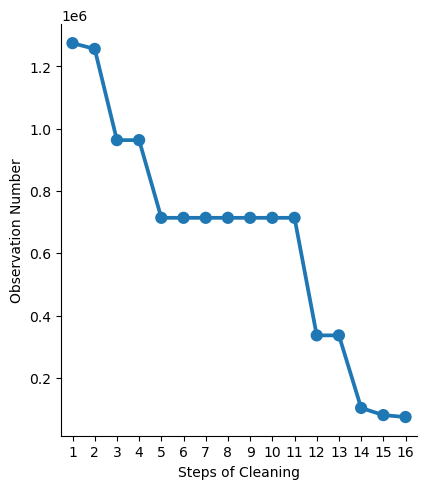

In [32]:
# Create the lineplot with Seaborn
ax = sns.catplot(x='Step_of_cleaning', y='Observation_number', kind="point", data=data_srinkage_tracker)
ax.set_xticklabels(range(1, data_srinkage_tracker.shape[0]+1))

plt.xlabel("Steps of Cleaning")
plt.ylabel("Observation Number")
# Show the plot
plt.show()

In [33]:
data_srinkage_tracker

,Step_of_cleaning,Observation_number
0,__clean_duration,1274593
1,__clean_posting_count,1256068
2,__clean_contract_type,963186
3,__clean_salary_dummy,963186
4,__clean_advertiser_type_value,713688
5,__clean_profession_code,713688
6,__clean_job_ID,713688
7,__clean_org_ID,713688
8,__clean_working_hours,713688
9,__clean_orga_industry_label,713688


## Robustness Checks Visuals

- I load in the initial dataset multiple times and perform only the most nessecary cleaning tasks, after that I compute the empiric stats
- I do this for: Distance, Duration, Postings count
- Salary, Language, Contract type


In [34]:
# creates category counts 

def get_category_counts(df, col_name):
    # Get the counts for each category
    counts = df[col_name].value_counts()
    
    # Calculate the relative share for each category
    relative_shares = counts / df.shape[0]
    
    # Create a new dataframe with the category names, the column name, and the relative shares
    result = pd.DataFrame({'Category': counts.index, 'Column': col_name, 'Relative Share': relative_shares})
    
    return result

# Salary Dummy

In [35]:
# Paths for accessing files dynamically
np.set_printoptions(threshold=sys.maxsize)
# Paths for accessing files dynamically
sub_path = os.getcwd()
path_cwd = os.path.dirname(sub_path)
path_dta = os.path.join(path_cwd, "Data")
# read in the paths
data = pd.DataFrame(pd.read_csv(path_dta + "/vacancies.csv"))

/var/folders/k1/n035yq891w95hzqpmlll09k80000gn/T/ipykernel_58277/1010200292.py:8: DtypeWarning: Columns (13,18,22,26,30,32,39,41) have mixed types. Specify dtype option on import or set low_memory=False.


In [36]:
#clean the salary
data = fc.__clean_salary_dummy(data)
salary_distr = get_category_counts(df = data, col_name = "salary_dummy")
nr_obs = data.shape[0]
print(salary_distr)
print(nr_obs)

       Category        Column  Relative Share
False     False  salary_dummy        0.880112
True       True  salary_dummy        0.119888
1527554


# Duration

In [37]:
# salary 
# Paths for accessing files dynamically
np.set_printoptions(threshold=sys.maxsize)
# Paths for accessing files dynamically
sub_path = os.getcwd()
path_cwd = os.path.dirname(sub_path)
path_dta = os.path.join(path_cwd, "Data")
# read in the paths
data = pd.DataFrame(pd.read_csv(path_dta + "/vacancies.csv"))

/var/folders/k1/n035yq891w95hzqpmlll09k80000gn/T/ipykernel_58277/3014200383.py:9: DtypeWarning: Columns (13,18,22,26,30,32,39,41) have mixed types. Specify dtype option on import or set low_memory=False.


In [38]:
#clean the duration
data = fc.__clean_duration(data = data)
summary = data["duration"].describe().round(1)
print(summary)

count    1512018.0
mean          67.1
std           81.5
min            1.0
25%           14.0
50%           39.0
75%           80.0
max          365.0
Name: duration, dtype: float64


/Users/luisenriquekaiser/Desktop/Inhalte/Uni_Bonn/Seminar/Project/Applied_Micro/functions_cleaning.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


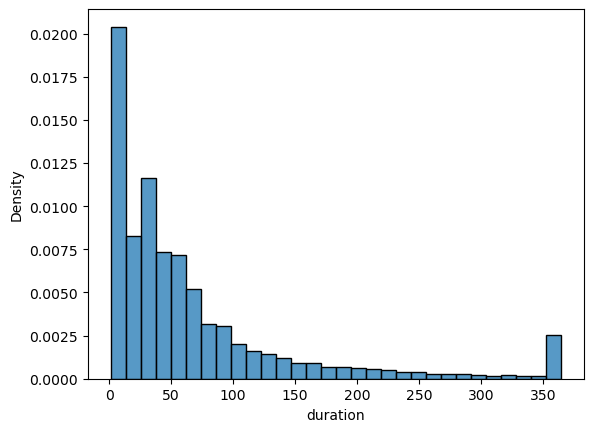

In [39]:
# Add a histogram
from IPython.display import display
plot = sns.histplot(data=data, x="duration", bins=30, stat="density")
plt.savefig("duration_uncleaned_histogram.png", format = "png", dpi = 300)
plt.show()

# Posting Count

In [40]:
# Paths for accessing files dynamically
np.set_printoptions(threshold=sys.maxsize)
# Paths for accessing files dynamically
sub_path = os.getcwd()
path_cwd = os.path.dirname(sub_path)
path_dta = os.path.join(path_cwd, "Data")
# read in the paths
data = pd.DataFrame(pd.read_csv(path_dta + "/vacancies.csv"))

/var/folders/k1/n035yq891w95hzqpmlll09k80000gn/T/ipykernel_58277/1010200292.py:8: DtypeWarning: Columns (13,18,22,26,30,32,39,41) have mixed types. Specify dtype option on import or set low_memory=False.


In [41]:
#clean the posting count
data = fc.__clean_posting_count(data = data)
summary = data["posting_count"].describe().round(1)
print(summary)

count    1492609.0
mean           2.6
std            3.7
min            1.0
25%            1.0
50%            1.0
75%            2.0
max           20.0
Name: posting_count, dtype: float64


# Language

In [42]:
# Paths for accessing files dynamically
np.set_printoptions(threshold=sys.maxsize)
# Paths for accessing files dynamically
sub_path = os.getcwd()
path_cwd = os.path.dirname(sub_path)
path_dta = os.path.join(path_cwd, "Data")
# read in the paths
data = pd.DataFrame(pd.read_csv(path_dta + "/vacancies.csv"))

/var/folders/k1/n035yq891w95hzqpmlll09k80000gn/T/ipykernel_58277/1010200292.py:8: DtypeWarning: Columns (13,18,22,26,30,32,39,41) have mixed types. Specify dtype option on import or set low_memory=False.


In [43]:
# clean the language
data = fc.__clean_language(data = data)
Language_distr = get_category_counts(df = data, col_name = "Applicant_language_cluster")
nr_obs = data.shape[0]
print(Language_distr)
print(nr_obs)

                    Category                      Column  Relative Share
German                German  Applicant_language_cluster        0.958584
International  International  Applicant_language_cluster        0.041416
1490624


/Users/luisenriquekaiser/Desktop/Inhalte/Uni_Bonn/Seminar/Project/Applied_Micro/functions_cleaning.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Education Level

In [44]:
# Paths for accessing files dynamically
np.set_printoptions(threshold=sys.maxsize)
# Paths for accessing files dynamically
sub_path = os.getcwd()
path_cwd = os.path.dirname(sub_path)
path_dta = os.path.join(path_cwd, "Data")
# read in the paths
data = pd.DataFrame(pd.read_csv(path_dta + "/vacancies.csv"))

/var/folders/k1/n035yq891w95hzqpmlll09k80000gn/T/ipykernel_58277/1010200292.py:8: DtypeWarning: Columns (13,18,22,26,30,32,39,41) have mixed types. Specify dtype option on import or set low_memory=False.


In [45]:
# clean education 
data = fc.__clean_education_level(data=data)
educ_distr = get_category_counts(df = data, col_name = "education_level_cluster")
nr_obs = data.shape[0]
print(educ_distr)
print(nr_obs)

                                    Category                   Column  \
Non university degree  Non university degree  education_level_cluster   
University degree          University degree  education_level_cluster   

                       Relative Share  
Non university degree        0.636499  
University degree            0.363501  
713919


# Distance

In [46]:

used_columns = [
    "organization_location_name",
    "advertiser_type_value",
    "advertiser_type_label",
    "posting_count",
    "date",
    "duration",
    "via_intermediary",
    "language",
    "job_title",
    "profession_value",
    "profession_isco_code_value",
    "profession_isco_code_label",
    "location",
    "location_name",
    "region_value",
    "region_label",
    "education_level_value",
    "education_level_label",
    "contract_type_value",
    "contract_type_label",
    "working_hours_type_value",
    "working_hours_type_label",
    "hours_per_week_from",
    "hours_per_week_to",
    "salary",
    "organization_industry_value",
    "organization_industry_label",
    "organization_size_value",
    "organization_size_label",
    "location_coordinates",
    "organization_ID",
    "contract_type_label_cluster",
    "salary_dummy",
    "Applicant_language_cluster",
    "education_level_cluster",
    "quarter_of_date",
    "month_of_date",
    "log_duration",
    "Latitudal_coordinates_organization",
    "Longitudinal_coordinates_organization",
    "Fuzzy_Rating",
    "latitudal_coordinates_job",
    "longitudinal_coordinates_job",
    "distance_between_job_and_organization",
    "profession_isco_code_value_agg_1",
    "profession_isco_code_value_agg_2",
]

In [47]:
# Paths for accessing files dynamically
np.set_printoptions(threshold=sys.maxsize)
# Paths for accessing files dynamically
sub_path = os.getcwd()
path_cwd = os.path.dirname(sub_path)
path_dta = os.path.join(path_cwd, "Data")
# read in the paths
data = pd.DataFrame(pd.read_csv(path_dta + "/vacancies.csv"))

np.set_printoptions(threshold=sys.maxsize)
# Paths for accessing files dynamically
sub_path = os.getcwd()
path_cwd = os.path.dirname(sub_path)
path_dta_cleaned = os.path.join(path_cwd, "Data_cleaned")
path_dta = os.path.join(path_cwd, "Data")
# read in the paths
city_gps_match_data = pd.DataFrame(pd.read_excel(path_dta + "/Cities_gps.xlsx"))

/var/folders/k1/n035yq891w95hzqpmlll09k80000gn/T/ipykernel_58277/165966093.py:8: DtypeWarning: Columns (13,18,22,26,30,32,39,41) have mixed types. Specify dtype option on import or set low_memory=False.


In [48]:
# create the distance measure
data = fd.create_distance_measures(
    data=data, city_gps_match_data=city_gps_match_data, used_columns=used_columns
)
# if not os.path.exists(os.path.dirname(filepath)):
#    os.makedirs(os.path.dirname(filepath))


/Users/luisenriquekaiser/Desktop/Inhalte/Uni_Bonn/Seminar/Project/Applied_Micro/functions_distance.py:232: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [49]:
data = data[0]

In [50]:
summary = data["distance_between_job_and_organization"].describe().round(1)
print(summary)

count    1127616.0
mean         135.3
std          170.6
min            0.0
25%            3.4
50%           37.6
75%          244.0
max          841.6
Name: distance_between_job_and_organization, dtype: float64


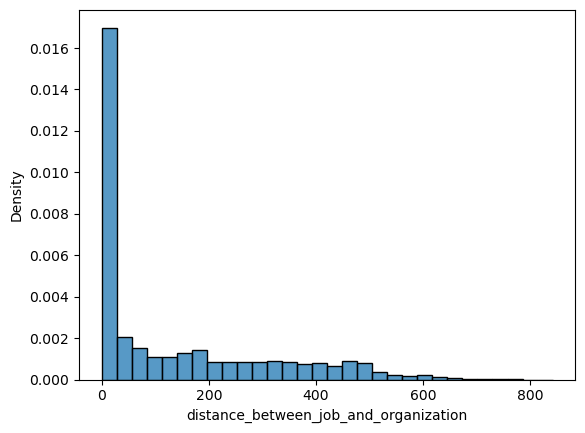

In [51]:
from IPython.display import display
plot = sns.histplot(data=data, x="distance_between_job_and_organization", bins=30, stat="density")
plt.savefig("distance_uncleaned_data.png", format = "png", dpi = 300)
plt.show()

# Robustness Checks 2 
#### I create an extrapolated version of the salary variable in two ways.

In [52]:
# Import the required libraries
from zipfile import ZipFile
import pandas as pd
import numpy as np
import os
import pickle
import sys  
import plotly.express as px
import plotly.graph_objects as go
import fuzzywuzzy as fw
from fuzzywuzzy import fuzz
import seaborn as sns
import seaborn.objects as so 
import openpyxl
#from functions_cleaning import *
import geopy
from geopy import distance
import statsmodels.formula.api as sm
import plotly.graph_objects as go
from plotnine import *
import matplotlib.pyplot as plt
from statistics import mean
#import functions_empirical_analysis as fea
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from linearmodels.iv.absorbing import AbsorbingLS
import matplotlib.pyplot as plt
import functions_cleaning as fc

In [53]:
# Paths for accessing files dynamically
sub_path = os.getcwd()
path_cwd = os.path.dirname(sub_path)
path_dta = os.path.join(path_cwd, "Applied_Micro")
data = pd.DataFrame(pd.read_excel(path_dta + "/Dataset_with_interactions.xlsx"))

- The idea is to extrapolate the salary for all values, where it is present
- I will use the threshold of 20000 as a threshold for a false salary, since the salaries should be on a yearly basis. 
- I will try two different extrapolation methods: 
    1) I will use all values below that as monthly salaries and compute the theoretical yearly salary.
    2) I will take the mean value of all values above that. All values below that get the mean value. 

In [54]:
def salary_extrapolator_1 (data, threshold): 
    # clean the salary
    data["salary_extrapolated_multiplication"] = data["salary"]
    data["salary_extrapolated_multiplication"] = pd.to_numeric(data["salary_extrapolated_multiplication"], errors="coerce")
    # extrapolate the salary 
    for i in range(data.shape[0]):
            if data.loc[i, "salary_extrapolated_multiplication"] < threshold:
                data.loc[i, "salary_extrapolated_multiplication"] = data.loc[i, "salary_extrapolated_multiplication"] * 12
            if data.loc[i, "salary_extrapolated_multiplication"] < threshold:
                data.loc[i, "salary_extrapolated_multiplication"] = threshold
    return data

def salary_extrapolator_2 (data, threshold):
    # clean the salary
    mean_salary = data["salary"].mean()
    data["salary_extrapolated_mean"] = data["salary"]
    # extrapolate the salary
    for i in range(data.shape[0]):
        if data.loc[i, "salary_extrapolated_mean"] < threshold:
            data.loc[i, "salary_extrapolated_mean"] = data.loc[i, "salary"]
            data.loc[i, "salary_extrapolated_mean"] = mean_salary
    #    else: 
    #        data.loc[i, "salary_extrapolated_mean"] = data.loc[i, "salary"]        
    return data



In [55]:
summary_before_extrapolation = data["salary"].describe().round(1)
print(summary_before_extrapolation)

count      6887.0
mean      16665.5
std       15717.3
min        5120.0
25%       11400.0
50%       11400.0
75%       12600.0
max      250000.0
Name: salary, dtype: float64


In [56]:
data = salary_extrapolator_1(data = data, threshold = 20000)

In [57]:
summary_after_extrapolation_1 = data["salary_extrapolated_multiplication"].describe().round(1)
print(summary_after_extrapolation_1)

count      6887.0
mean     123936.0
std       44928.7
min       20000.0
25%      108000.0
50%      136800.0
75%      136800.0
max      250000.0
Name: salary_extrapolated_multiplication, dtype: float64


In [58]:
data = salary_extrapolator_2(data = data, threshold = 20000)

In [59]:
summary_after_extrapolation_2 = data["salary_extrapolated_mean"].describe().round(1)
print(summary_after_extrapolation_2)

count      6887.0
mean      21081.8
std       14092.0
min       16665.5
25%       16665.5
50%       16665.5
75%       16665.5
max      250000.0
Name: salary_extrapolated_mean, dtype: float64


In [60]:
data.to_excel("Dataset_with_interactions_and_salary_extrapolated.xlsx", index=False)